# BREAST CANCER DIAGNOSIS MODEL

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

In [136]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [137]:
print(df.shape)

(569, 33)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [139]:
df.value_counts()

Series([], dtype: int64)

In [140]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [141]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [144]:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [152]:
del df['Unnamed: 32']
X = df.drop(['diagnosis','id'],axis=1).values

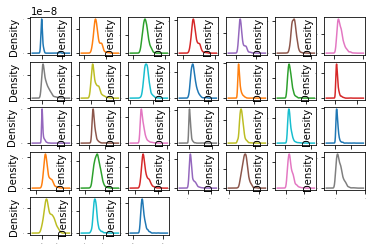

In [153]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

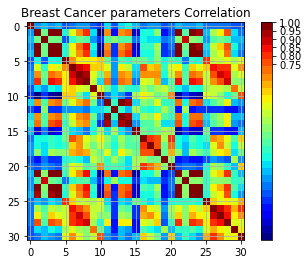

In [154]:
from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer parameters Correlation')
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

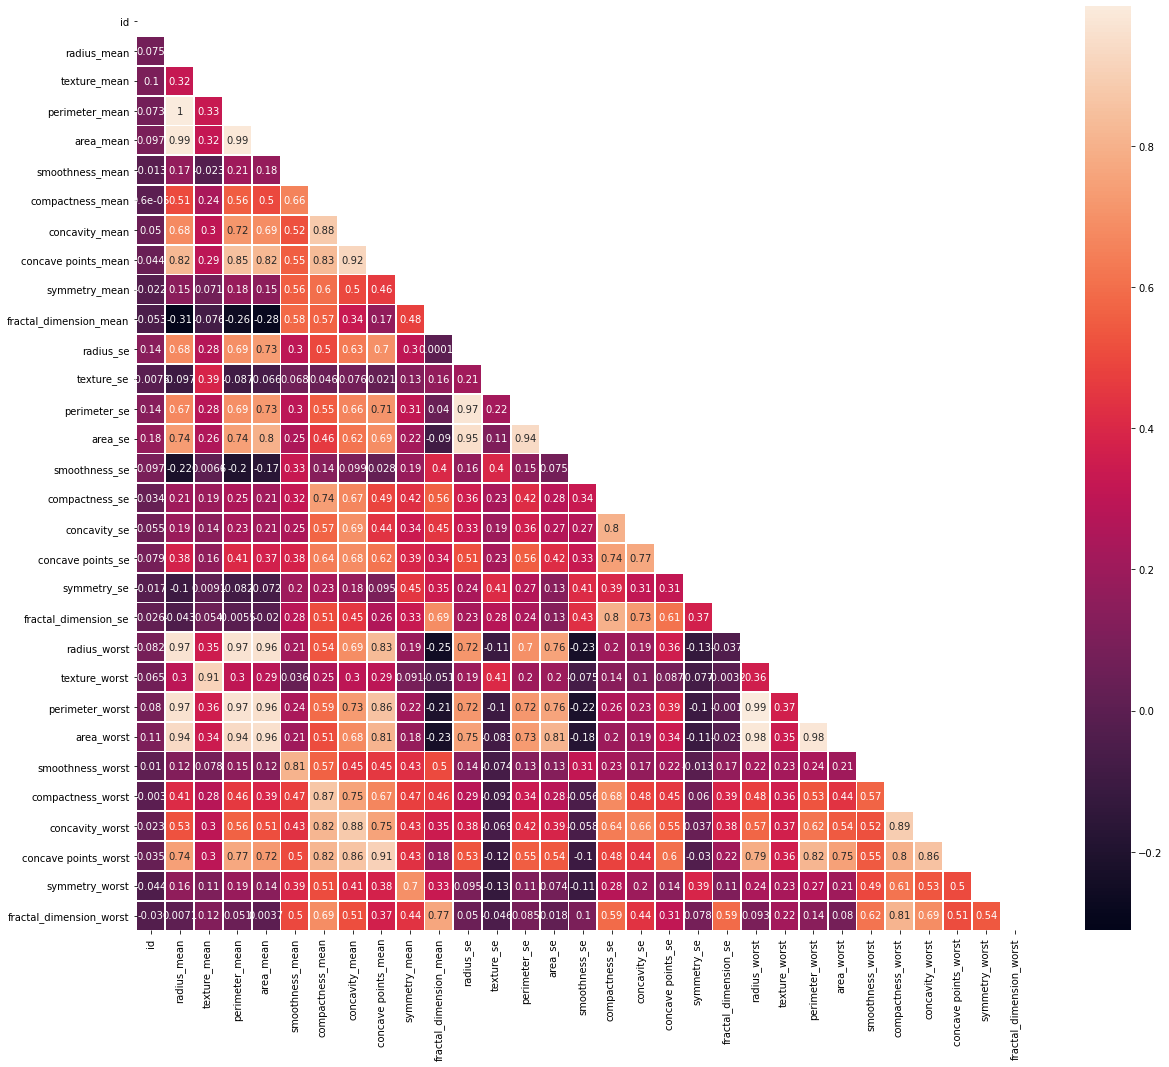

In [155]:
import seaborn as sns
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

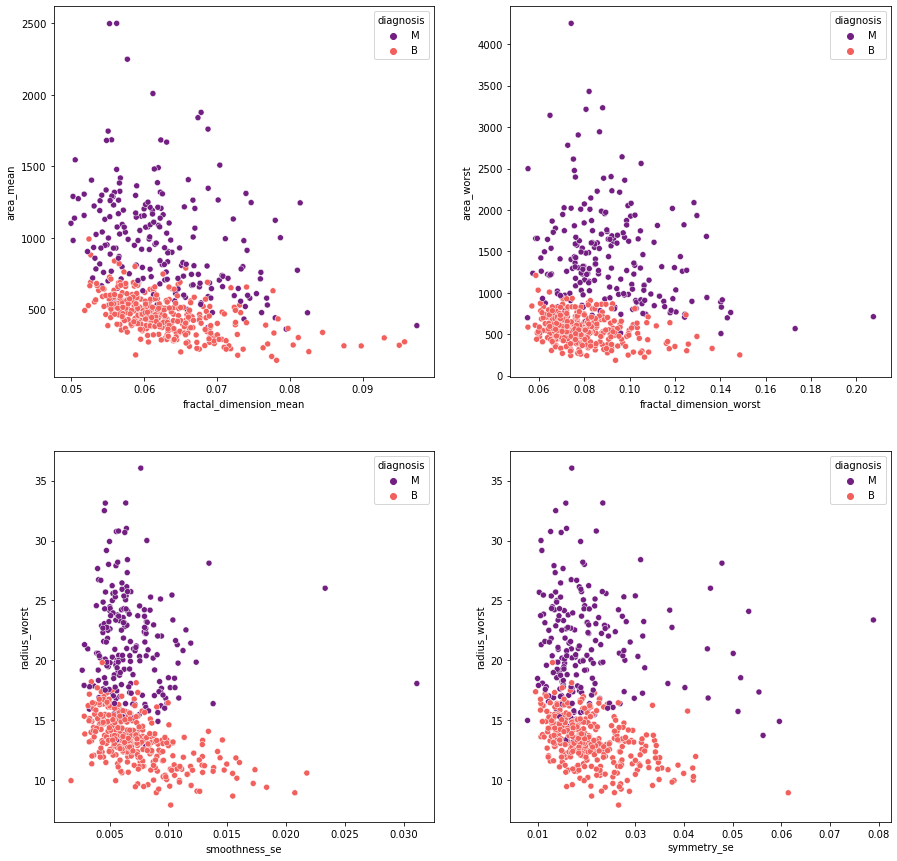

In [178]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(x='fractal_dimension_mean', y='area_mean', hue="diagnosis",
                data=df, ax=ax[0][0], palette='magma')
sns.scatterplot(x='fractal_dimension_worst', y='area_worst', hue="diagnosis",
                data=df, ax=ax[0][1], palette='magma')
sns.scatterplot(x='smoothness_se', y='radius_worst', hue="diagnosis",
                data=df, ax=ax[1][0], palette='magma')
sns.scatterplot(x='symmetry_se', y='radius_worst', hue="diagnosis",
                data=df, ax=ax[1][1], palette='magma');

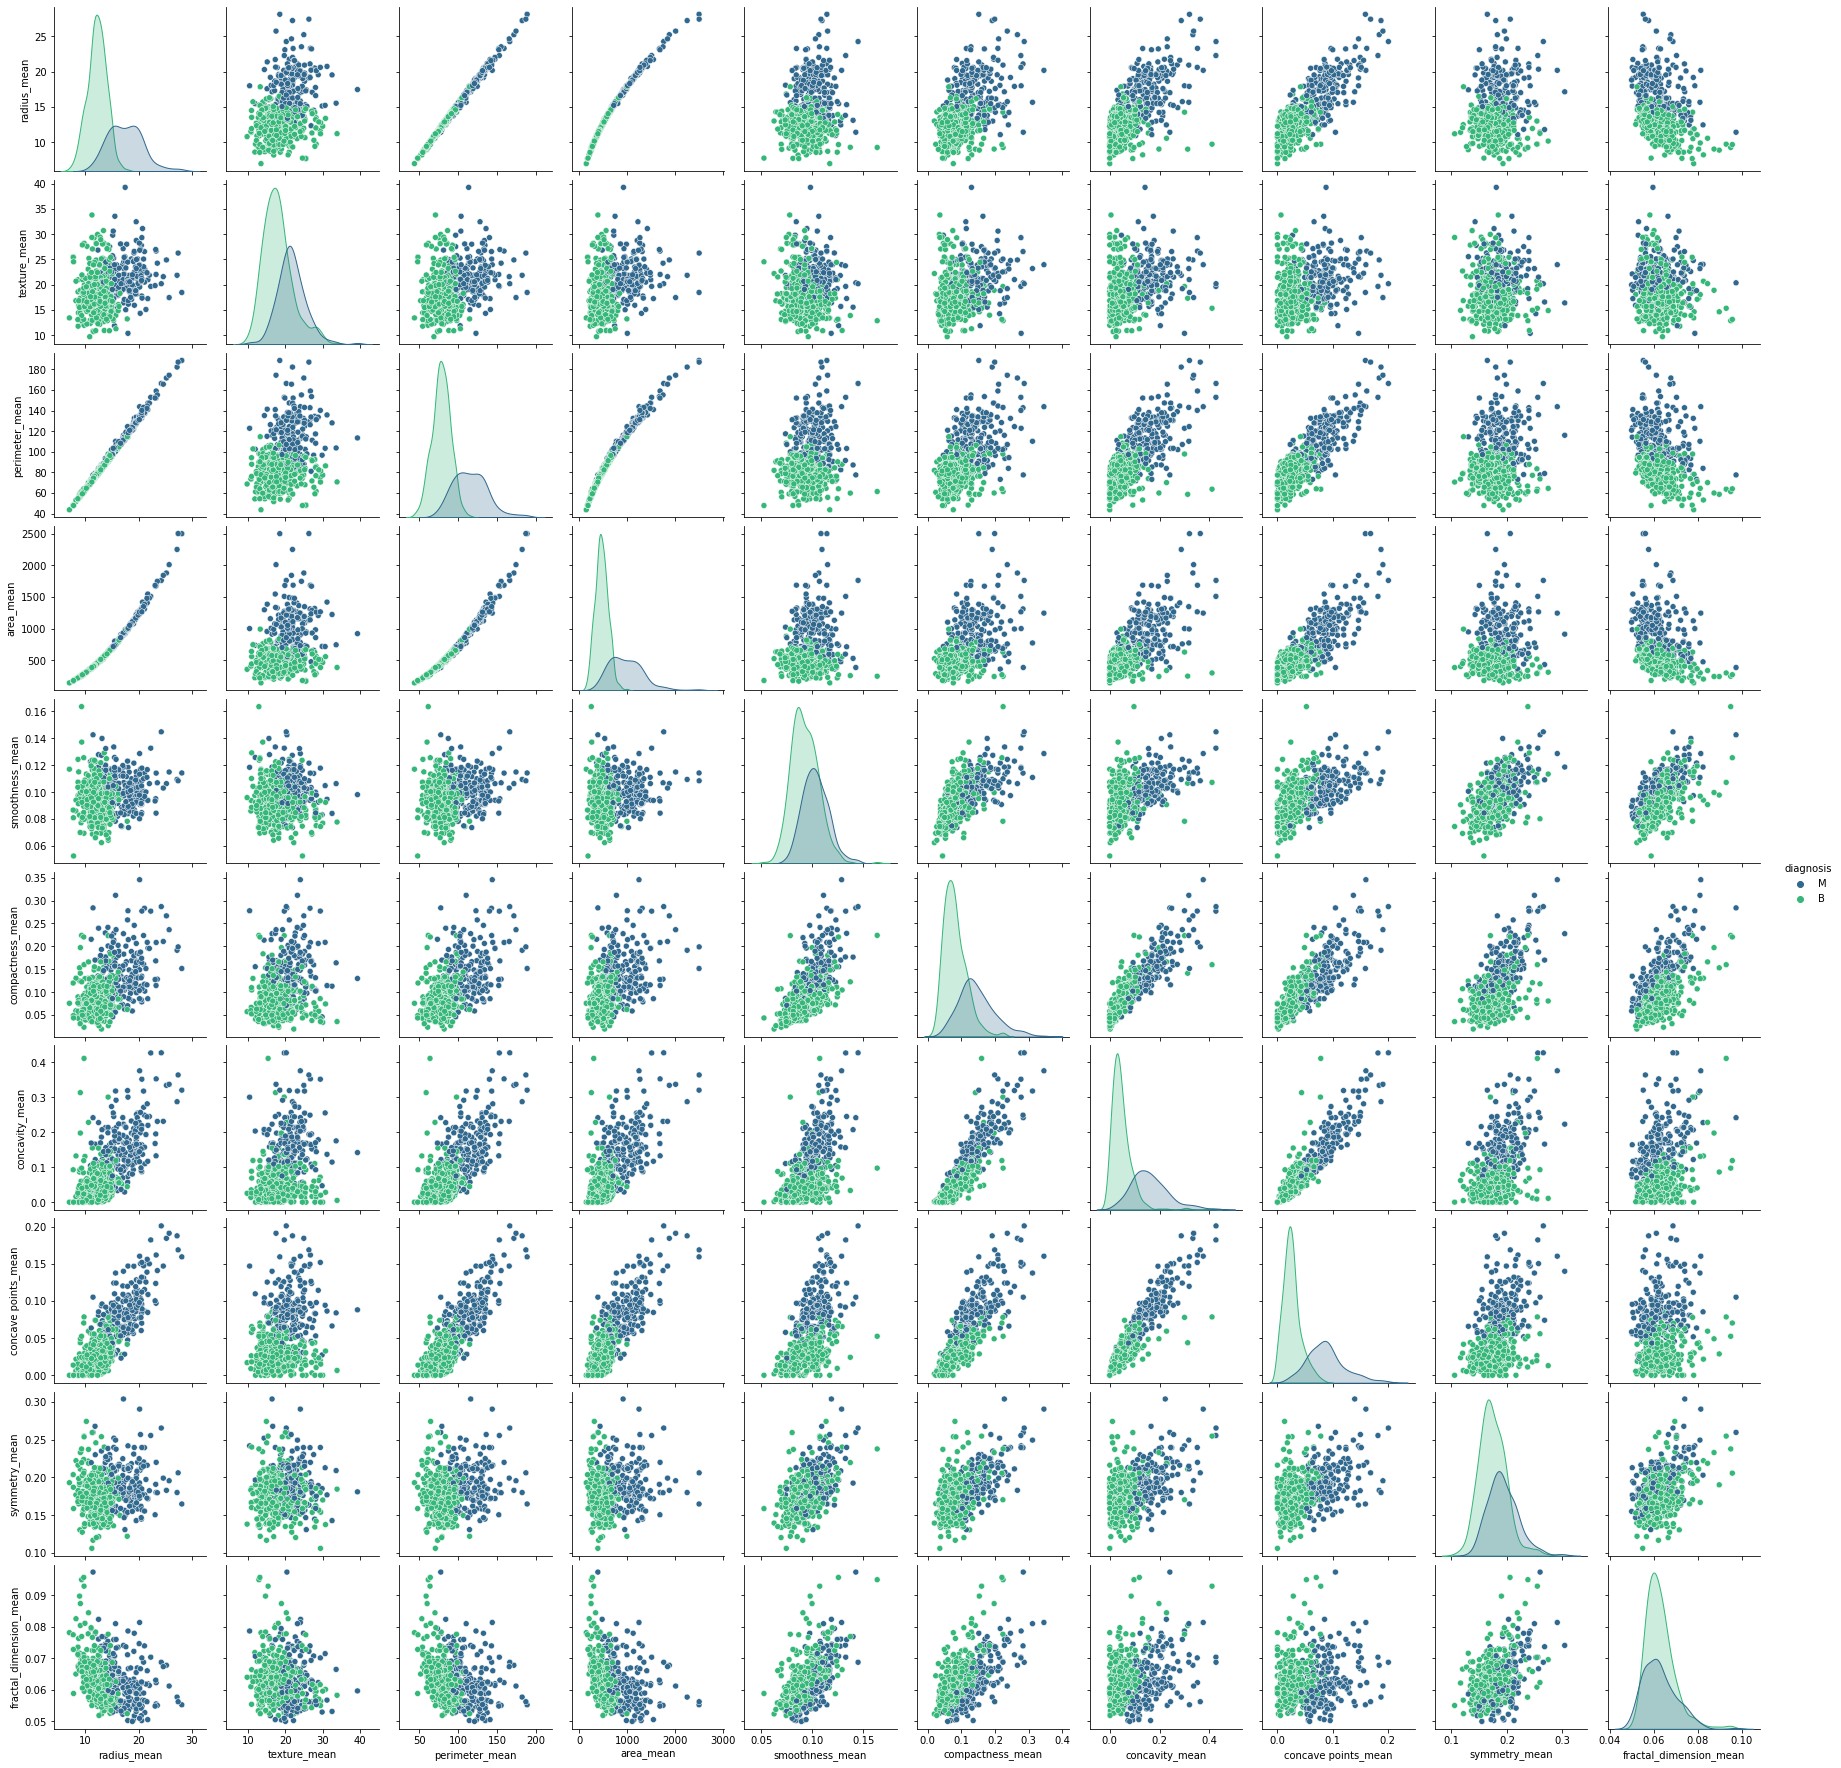

In [180]:
# Creating a list of columns with only the columns that represent the mean.
mean_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(df[mean_columns], hue="diagnosis", palette='viridis')

In [156]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:].values
Y = df.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [157]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 99.06
Classification Report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       267
           M       1.00      0.97      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

Confusion Matrix:
[[267   0]
 [  4 155]]


                                 ---- Test data ----
Accuracy: 95.80
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        90
           M       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
[[87  3]
 [ 3 50]]


In [168]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 97.42
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       267
           M       0.98      0.95      0.96       159

    accuracy                           0.97       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426

Confusion Matrix:
[[264   3]
 [  8 151]]


                                 ---- Test data ----
Accuracy: 95.10
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.99      0.96        90
           M       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Confusion Matrix:
[[89  1]
 [ 6 47]]


In [169]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 98.59
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       267
           M       0.99      0.97      0.98       159

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426

Confusion Matrix:
[[265   2]
 [  4 155]]


                                 ---- Test data ----
Accuracy: 97.20
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        90
           M       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:
[[88  2]
 [ 2 51]]


In [170]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 98.59
Classification Report:
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       267
           M       0.99      0.97      0.98       159

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426

Confusion Matrix:
[[266   1]
 [  5 154]]


                                 ---- Test data ----
Accuracy: 96.50
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.98      0.97        90
           M       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

Confusion Matrix:
[[88  2]
 [ 3 50]]


In [171]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 94.84
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.98      0.96       267
           M       0.96      0.90      0.93       159

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

Confusion Matrix:
[[261   6]
 [ 16 143]]


                                 ---- Test data ----
Accuracy: 91.61
Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.93      0.93        90
           M       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Confusion Matrix:
[[84  6]
 [ 6 47]]


In [172]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 100.00
Classification Report:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       267
           M       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Confusion Matrix:
[[267   0]
 [  0 159]]


                                 ---- Test data ----
Accuracy: 95.80
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.96      0.97        90
           M       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
[[86  4]
 [ 2 51]]


In [173]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# Evaluate on training data
print('\n                                 -- Training data --')
predictions = classifier.predict(X_train)

accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, predictions))
print('')

# Evaluate on test data
print('\n                                 ---- Test data ----')
predictions = classifier.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))

print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))


                                 -- Training data --
Accuracy: 99.77
Classification Report:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       267
           M       1.00      0.99      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Confusion Matrix:
[[267   0]
 [  1 158]]


                                 ---- Test data ----
Accuracy: 98.60
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        90
           M       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[89  1]
 [ 1 52]]
